# Machine learning 
### Regularization
### Created by Dawid Lisek

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Ex. 1 Split train-test dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=0.2, random_state=42)

In [7]:
X = bos.values
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex. 2 Linear regression

In [8]:
regr = LinearRegression()
reg = regr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

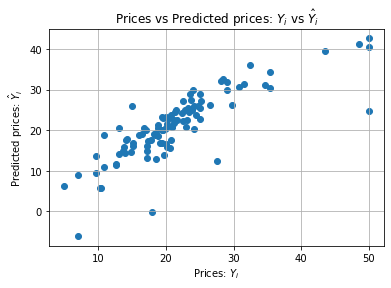

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()

How should an ideal scatter look like? It should be a linear function.

Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

In [10]:
from sklearn.metrics import mean_squared_error
print(f'Błąd średniokwadratowy: {mean_squared_error(y_test, y_pred)}')

Błąd średniokwadratowy: 24.291119474973456


Ex. 4: Calculate the model.score. Check what it is for linear problems. 

In [11]:
regr.score(X_train, y_train)

0.7508856358979673

Standarization

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
polynomial_features= PolynomialFeatures(degree=2)
scaler = StandardScaler()
scaled_bos = scaler.fit_transform(bos)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(scaled_bos, boston.target, test_size=0.2, random_state=42)

In [14]:
pipe = Pipeline([('polynomial', polynomial_features), ('reg', LinearRegression())])
pipe.fit(X_train_sc, y_train_sc)
y_pred_sc = pipe.predict(X_test_sc)
pipe.score(X_test_sc, y_test_sc)

0.8055521075469616

In [15]:
print(f'Błąd średniokwadratowy: {mean_squared_error(y_test_sc, y_pred_sc)}')

Błąd średniokwadratowy: 14.259599581132916


Ex. 5: Lasso

Lasso Regression:

Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients

Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

In [16]:
from sklearn.linear_model import Lasso, Ridge

In [17]:
import warnings

warnings.filterwarnings('ignore')

alphas = np.linspace(0, 100, 1000)
train_scores_L = []
test_scores_L = []
for i in alphas:
    pipe_i = Pipeline([('polynomial', polynomial_features), ('lasso', Lasso(alpha=i))])
    pipe_i.fit(X_train_sc, y_train_sc)
    test_scores_L.append(pipe_i.score(X_test_sc, y_test_sc))
    train_scores_L.append(pipe_i.score(X_train_sc, y_train_sc))

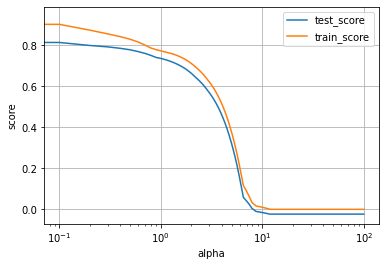

In [18]:
plt.figure()
plt.semilogx(alphas, test_scores_L, label='test_score')
plt.semilogx(alphas, train_scores_L, label= 'train_score')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

In [19]:
best_lasso = np.argmax(test_scores_L)
best_lasso_alpha = alphas[best_lasso]
print(f'Najlepszy parametr alfa wynosi: {best_lasso_alpha}')

Najlepszy parametr alfa wynosi: 0.1001001001001001


In [20]:
pipe = Pipeline([('polynomial', polynomial_features), ('lasso', Lasso(alpha=best_lasso_alpha))])
pipe.fit(X_train_sc, y_train_sc)
y_pred_sc = pipe.predict(X_test_sc)
print(f'Dokładność dla najlepszej alfy wynosi: {pipe.score(X_test_sc, y_test_sc)}')

Dokładność dla najlepszej alfy wynosi: 0.8129625917940622


Skuteczność dla Lasso wyniosła ok 0.81.

Ex. 6 Ridge

Ridge Regression:

Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients

Minimization objective = LS Obj + α * (sum of square of coefficients)


In [21]:
alphas = np.linspace(0, 1000, 1000)
train_scores_R = []
test_scores_R = []
for i in alphas:
    pipe_i = Pipeline([('polynomial', polynomial_features), ('ridge', Ridge(alpha=i))])
    pipe_i.fit(X_train_sc, y_train_sc)
    test_scores_R.append(pipe_i.score(X_test_sc, y_test_sc))
    train_scores_R.append(pipe_i.score(X_train_sc, y_train_sc))

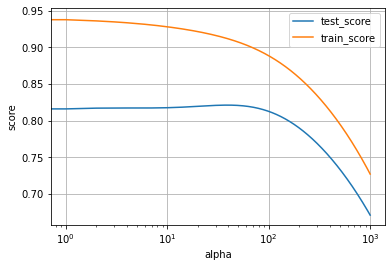

In [22]:
plt.figure()
plt.semilogx(alphas, test_scores_R, label='test_score')
plt.semilogx(alphas, train_scores_R, label= 'train_score')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

In [23]:
best_ridge = np.argmax(test_scores_R)
best_ridge_alpha = alphas[best_ridge]
print(f'Najlepszy parametr alfa wynosi: {best_ridge_alpha}')

Najlepszy parametr alfa wynosi: 39.03903903903904


In [24]:
pipe = Pipeline([('polynomial', polynomial_features), ('ridge', Ridge(alpha=best_ridge_alpha))])
pipe.fit(X_train_sc, y_train_sc)
y_pred_sc = pipe.predict(X_test_sc)
print(f'Dokładność dla najlepszej alfy wynosi: {pipe.score(X_test_sc, y_test_sc)}')

Dokładność dla najlepszej alfy wynosi: 0.8212648012489789


### Regularization for logistic regression

In [25]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Ex. 1: Divide the dataset into training and testing.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)

Ex. 2: Using the available libraries in Python, create a logistic regression model with L1 regularization and C = 1 regularization parameter.

In [28]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=200)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.956140350877193

Ex. 3: Draw a plot of the algorithm accuracy for the L2 regularization (10 values of the regularization parameter C in the following range [0.0001; 1])

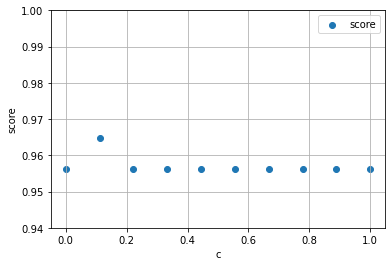

In [29]:
scores = []
c_parameter = np.linspace(0.0001, 1, 10)
for c in c_parameter:
    reg = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=200)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))

plt.figure()
plt.scatter(c_parameter, scores, label='score')
plt.xlabel('c')
plt.ylabel('score')
plt.ylim(0.94, 1)
plt.legend()
plt.grid()
plt.show()

In [30]:
best_c = c_parameter[np.argmax(scores)]
print(f'Najlepsze c wynosi: {best_c}')
print(f'Dokładnośc dla najlepszego c: {np.max(scores)}')

Najlepsze c wynosi: 0.11120000000000001
Dokładnośc dla najlepszego c: 0.9649122807017544


### Regularization for kNN method


Using the solution from previous lab, please draw a plot for the kNN algorithm's accuracy depending on the value of k. Please indicate the optimal value for k.

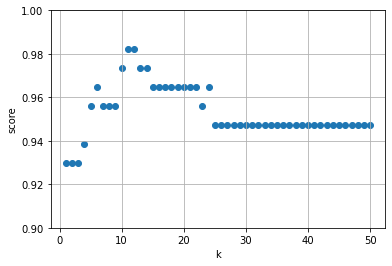

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

for k in range(1, 51):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.scatter(range(1, 51), accuracy)
plt.xlabel('k')
plt.ylabel('score')
plt.ylim(0.9, 1)
plt.grid()
plt.show()


In [32]:
best_k = np.argmax(accuracy) + 1
print(f'Najlepsze k wynosi: {best_k}')
print(f'Dokładnośc dla najlepszego k: {np.max(accuracy)}')

Najlepsze k wynosi: 11
Dokładnośc dla najlepszego k: 0.9824561403508771


### Decision trees optimization

Using the solution from previous lab, please draw a plot for the decision tree accuracy/score depending on the depth of the tree. Please indicate the optimal tree depth.

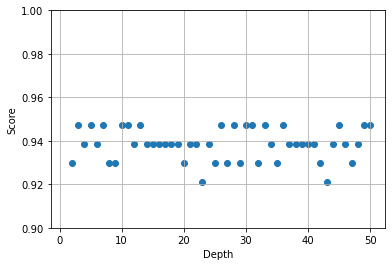

In [33]:
from sklearn.tree import DecisionTreeClassifier

accuracy = []

for depth in range(1, 51):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.scatter(range(1, 51), accuracy)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.ylim(0.9, 1)
plt.grid()
plt.show()

In [34]:
best_depth = np.argmax(accuracy) + 1
print(f'Najlepsze szerokość drzewa wynosi: {best_depth}')
print(f'Dokładnośc dla najlepszego depth: {np.max(accuracy)}')

Najlepsze szerokość drzewa wynosi: 3
Dokładnośc dla najlepszego depth: 0.9473684210526315
